In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.datasets import mnist
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
# Let's import the data
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize the data
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

# Add noise to the data
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Clip the data to be between 0 and 1
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

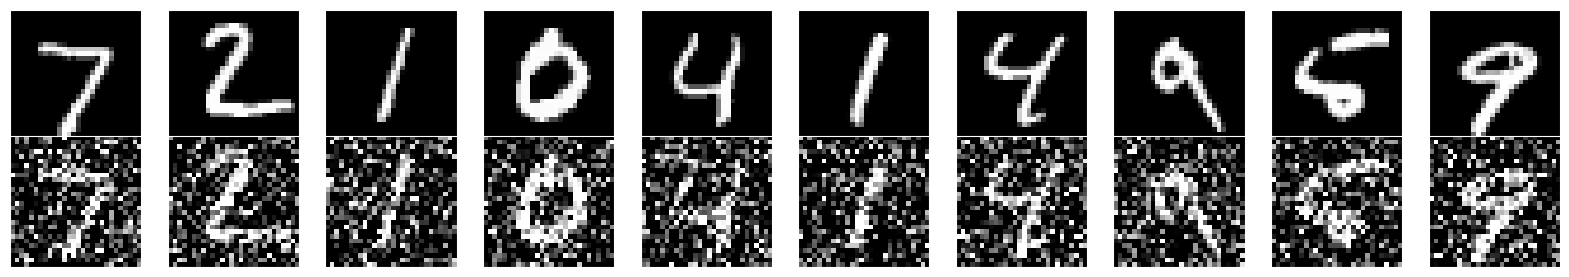

In [7]:
#Let's plot the noisy data
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):

    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [9]:
# Code for Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [10]:
# Define the decoder model
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Define the autoencoder model
autoencoder = Model(input_img, decoded, name="Convolutional_AutoEncoder")
autoencoder.summary()

Model: "Convolutional_AutoEncoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - loss: 0.1124 - val_loss: 0.1046
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.1054 - val_loss: 0.1041
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.1050 - val_loss: 0.1038
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.1044 - val_loss: 0.1033
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.1042 - val_loss: 0.1026
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - loss: 0.1034 - val_loss: 0.1024
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.1027 - val_loss: 0.1019
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 0.1025 - val_loss: 0.1012
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.1021 - val_loss: 0.1009
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.1016 - val_loss: 0.1006
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


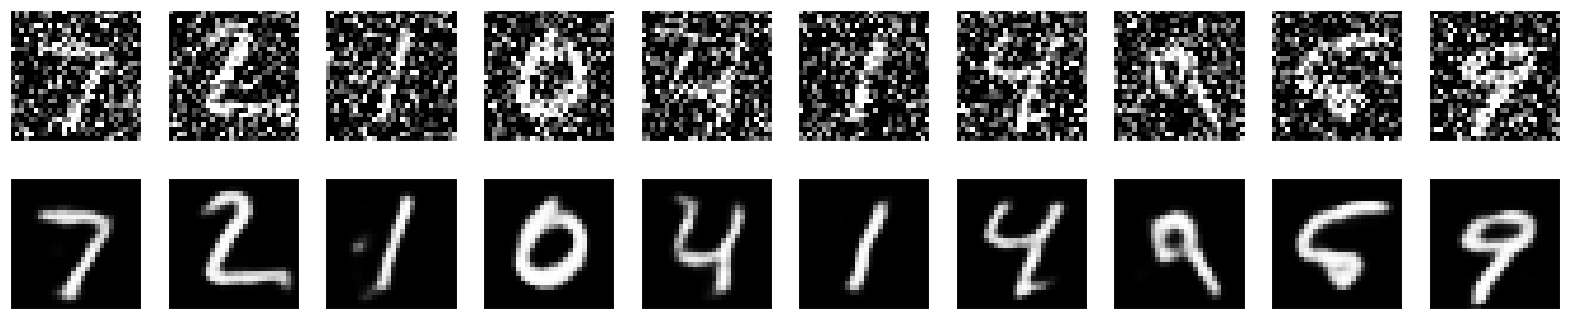

In [12]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(X_train_noisy, X_train, epochs=10, batch_size=256, shuffle=True, validation_data=(X_test_noisy, X_test))

# Let's plot some of the images
decoded_imgs = autoencoder.predict(X_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


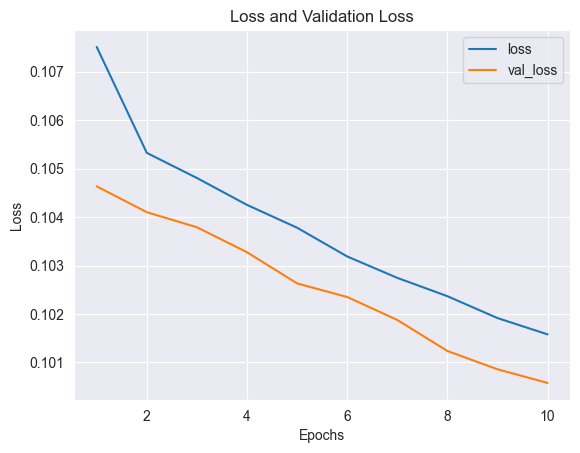

In [14]:
epochs = list(range(1, 11))
sns.lineplot(x=epochs, y=history.history['loss'], label='loss')
sns.lineplot(x=epochs, y=history.history['val_loss'], label='val_loss')
plt.title('Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()